In [1]:
# Importing first libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Classification
# Dataset - phone price ranges with specifications. 
# 1) Data preprocessing, 
# 2) Exploratory data analysis, 
# 3) Feature engineering, 
# 4) Predicting Price based on independant features, 
# 5) Evaluating the best performing model based on numerous metrics

# DATA PREPROCESSING

In [3]:
# Loading the dataset.
data = pd.read_csv("phones.csv")
print("Shape of the dataset is :{}".format(data.shape))
data.head()

Shape of the dataset is :(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Descriptive statistics of the dataset.
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# Basic information about the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Looking for null values in our features.
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [7]:
# Assigning all numerical columns into one variable.
indices = data.select_dtypes(include="number").columns

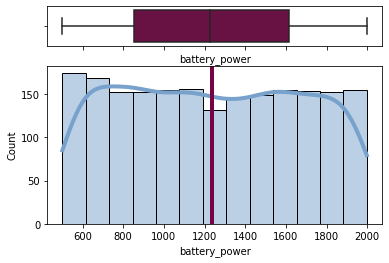

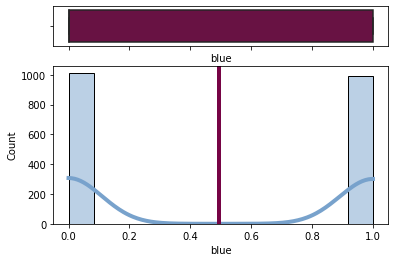

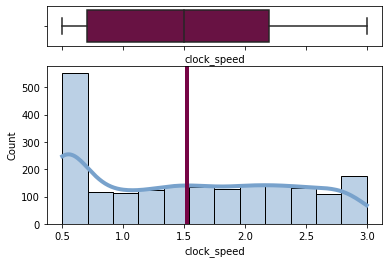

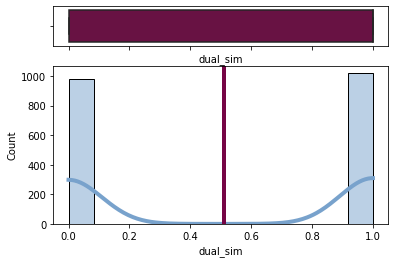

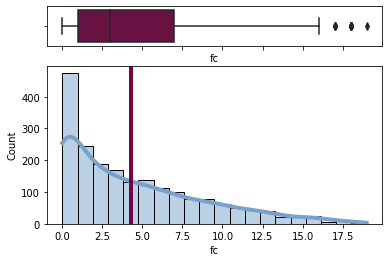

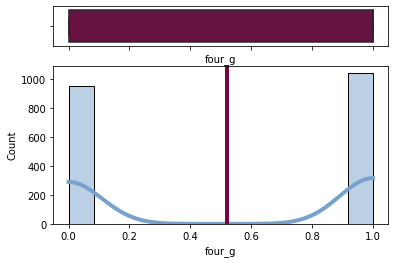

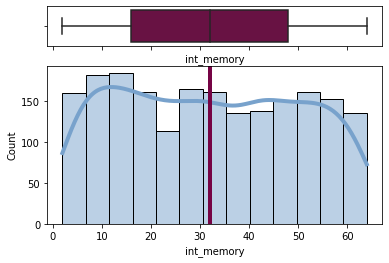

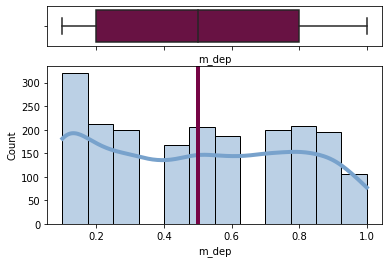

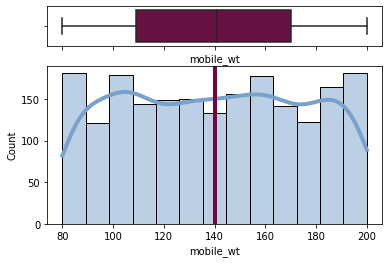

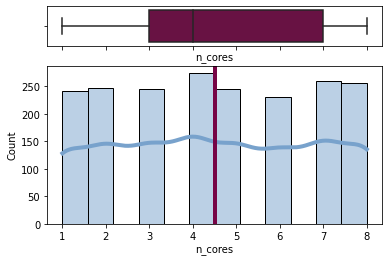

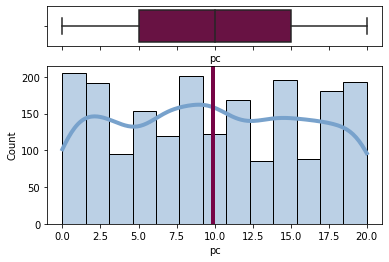

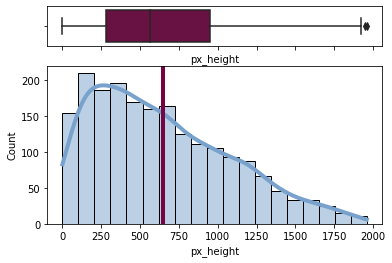

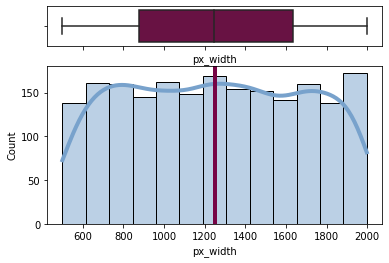

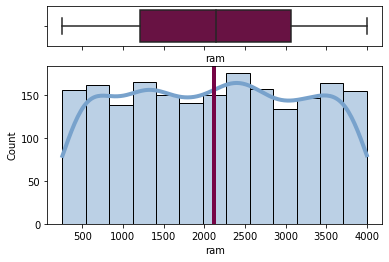

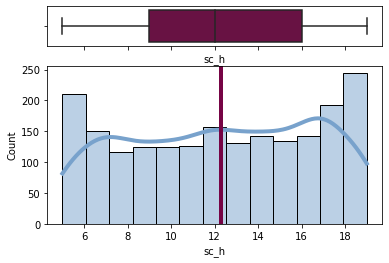

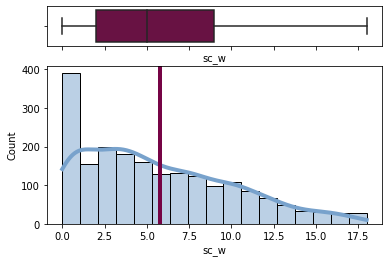

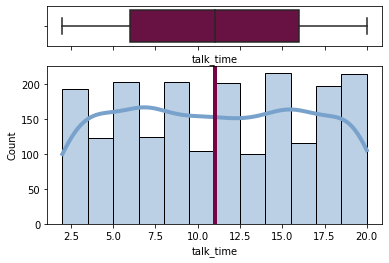

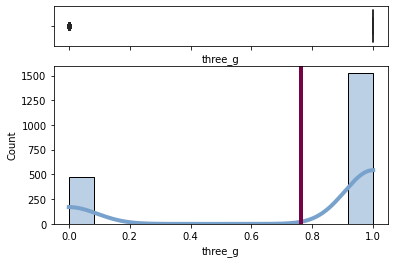

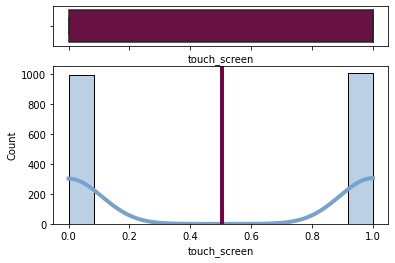

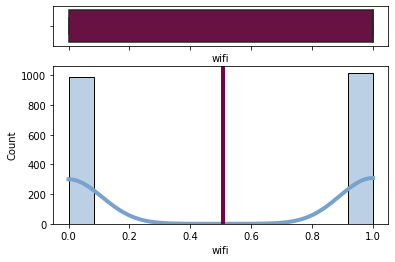

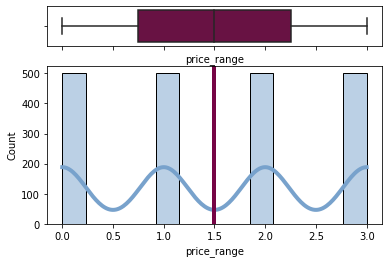

In [8]:
# Plotting histograms with bar plots for each numerical column.
for i in indices:
       fig, (ax_box, ax_dist,) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)})
       sns.boxplot(x=i, data=data, color="#760445", ax=ax_box)
       sns.histplot(x=i, data=data, color="#78A2CC", ax=ax_dist, kde=True,line_kws={"linewidth":4})
       plt.axvline(data[i].mean(), color="#760445", linewidth=4)
       plt.show()

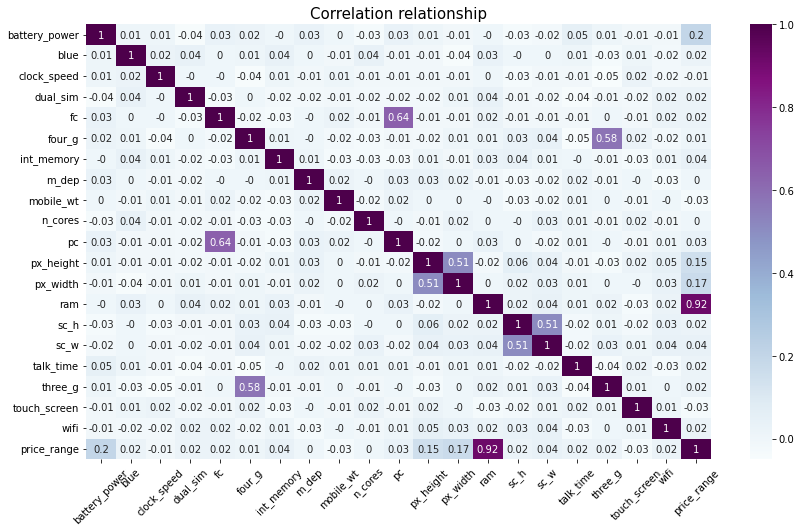

In [9]:
# Correlation matrix, we can see a high correlation between RAM and Price.
plt.figure(figsize=(14,8))
sns.heatmap(round(data.corr(),2), annot=True, cmap="BuPu")
plt.title("Correlation relationship", size=15)
plt.xticks(rotation=45)
plt.show()

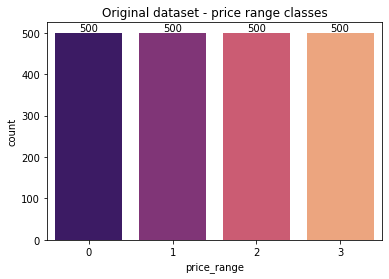

In [10]:
# Plotting all classes in Price column. (Our dependant variable)
haz = sns.countplot(x="price_range", data=data, palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Original dataset - price range classes")
plt.show()

In [11]:
# Splitting dataset into 2, X = independant variables/features, Y = dependant variable.
X = data.drop(columns="price_range")
Y = data["price_range"]

In [12]:
# Splitting the data into Training & Testing datasets using sklearn's train_test_split.
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [13]:
# Printing shapes of all datasets.
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape) 
print(yTest.shape)

(1500, 20)
(500, 20)
(1500,)
(500,)


In [14]:
# Importing metrics
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_auc_score, log_loss, matthews_corrcoef, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate

In [15]:
# Creating a results dataframe, which we will use to display results of every ML model.
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionAvg", "RecallAvg", "F1Avg", "RocAuc"])

In [16]:
# Disabling warnings.
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Creating a function for all metrics, so retyping the code for every single ML model is not neeeded.
# Logistic Regression
# GaussianNB
# DecisionTreeClassifier
# RandomForestClassifier
# KNN
# SVC
# XGB
def classificationmodel(test):
    test.fit(xTrain, yTrain)
    scoretrain = test.score(xTrain, yTrain)
    scoretest = test.score(xTest, yTest)
    print("Score of the training dataset:", test.score(xTrain, yTrain))
    print("Score of the testing dataset:", test.score(xTest, yTest))
    print("Log-loss of the testing dataset:", log_loss(yTest, test.predict_proba(xTest)))
    print("ROC-AUC score of the testing dataset:", roc_auc_score(yTest, test.predict_proba(xTest), multi_class="ovr"))
    print("Classification report on Testing split:")
    print(classification_report(yTest, test.predict(xTest)))
    plot_confusion_matrix(test, xTest, yTest)
    if len(results.index) == 0:
        results.loc[len(results.index)] = ["LR", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"), recall_score(y_true=yTest, y_pred=test.predict(xTest), average='macro'), f1_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"), roc_auc_score(yTest, test.predict_proba(xTest), multi_class="ovr")]
    elif len(results.index) == 1:
        results.loc[len(results.index)] = ["GNB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"), recall_score(y_true=yTest, y_pred=test.predict(xTest), average='macro'), f1_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"),roc_auc_score(yTest, test.predict_proba(xTest), multi_class="ovr")]
    elif len(results.index) == 2:
        results.loc[len(results.index)] = ["DTC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"), recall_score(y_true=yTest, y_pred=test.predict(xTest), average='macro'), f1_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"),roc_auc_score(yTest, test.predict_proba(xTest), multi_class="ovr")]
    elif len(results.index) == 3:
        results.loc[len(results.index)] = ["RFC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"), recall_score(y_true=yTest, y_pred=test.predict(xTest), average='macro'), f1_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"),roc_auc_score(yTest, test.predict_proba(xTest), multi_class="ovr")]
    elif len(results.index) == 4:
        results.loc[len(results.index)] = ["KNN", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"), recall_score(y_true=yTest, y_pred=test.predict(xTest), average='macro'), f1_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"),roc_auc_score(yTest, test.predict_proba(xTest), multi_class="ovr")]
    elif len(results.index) == 5:
        results.loc[len(results.index)] = ["GBC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"), recall_score(y_true=yTest, y_pred=test.predict(xTest), average='macro'), f1_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"),roc_auc_score(yTest, test.predict_proba(xTest), multi_class="ovr")]
    elif len(results.index) == 6:
        results.loc[len(results.index)] = ["XGB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"), recall_score(y_true=yTest, y_pred=test.predict(xTest), average='macro'), f1_score(y_true=yTest, y_pred=test.predict(xTest), average="macro"),roc_auc_score(yTest, test.predict_proba(xTest), multi_class="ovr")]

def crossval(m):
    print("Cross-validation on Training split (mean, cv=5):")
    for i in ["accuracy", "roc_auc_ovr"]:
        print(i.upper())
        print(cross_val_score(m, xTrain, yTrain, scoring=i).mean())
    print("\n")

In [18]:
# EXPLANATION OF ALL METRICS
# Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model, cv = number of folds.
# Accuracy - Informally, accuracy is the fraction of predictions our model got right. ((Number of correct predicitions)"/(Total number of predictions))
# Log-loss - Measures the amount of divergence of predicted probability with the actual label. So lesser the log loss value, more the perfectness of model.
# ROC-AUC - Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
# Precision - (True positive)/(True positive + False positive)
# Recall - (True positive)/(True positive + False negative)
# F1 score is a weighted average of precision and recall.



# Trying the first two models

Cross-validation on Training split (mean, cv=5):
ACCURACY
0.6366666666666667
ROC_AUC_OVR
0.8813491705379828


Score of the training dataset: 0.648
Score of the testing dataset: 0.628
Log-loss of the testing dataset: 0.7686626227374339
ROC-AUC score of the testing dataset: 0.878448798370097
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       128
           1       0.53      0.50      0.52       123
           2       0.54      0.47      0.50       138
           3       0.61      0.79      0.69       111

    accuracy                           0.63       500
   macro avg       0.63      0.64      0.63       500
weighted avg       0.63      0.63      0.62       500



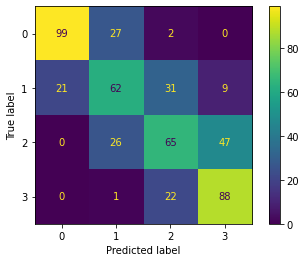

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean, cv=5):
ACCURACY
0.8119999999999999
ROC_AUC_OVR
0.9520837679283598


Score of the training dataset: 0.8266666666666667
Score of the testing dataset: 0.784
Log-loss of the testing dataset: 0.49306113510928695
ROC-AUC score of the testing dataset: 0.9449978673222301
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       128
           1       0.65      0.67      0.66       123
           2       0.71      0.71      0.71       138
           3       0.89      0.91      0.90       111

    accuracy                           0.78       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.78      0.79       500



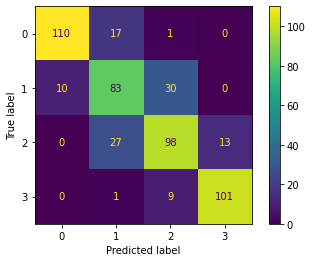

In [20]:
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
crossval(GSS)
classificationmodel(GSS)

# Feature engineering

In [21]:
# The result of standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively.
# Normalization rescales features with a distribution value between 0 and 1. For every feature, the minimum value of that feature gets transformed into 0, and the maximum value gets transformed into 1. 

def transformization(tran):
    global xTrain, yTrain
    if tran == "stand":
        print("You have selected Standardization.")
        from sklearn.preprocessing import StandardScaler
        xTrain, xTest, yTrain, yTest = train_test_split(X,Y)
        scal = StandardScaler()
        xTrain = scal.fit_transform(xTrain)
        xTest = scal.transform(xTest)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)

    elif tran == "norm":
        print("You have selected Normalization.")
        from sklearn.preprocessing import MinMaxScaler
        xTrain, xTest, yTrain, yTest = train_test_split(X,Y)
        norm = MinMaxScaler()
        xTrain = norm.fit_transform(xTrain)
        xTest = norm.transform(xTest)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)
        
    else:
        print("You didn't select any type of transformation of features, proceeding with the original dataset.")

# Oversampling - Randomly duplicate examples in the minority class.
# Undersampling - Randomly delete examples in the majority class.
# Smote - another oversampling technique.

def classdist(classd):
    global xTrain, yTrain
    if classd == "over":
        print("You have selected Oversampling.")
        from imblearn.over_sampling import RandomOverSampler
        ros = RandomOverSampler(sampling_strategy="minority")
        xTrain, yTrain = ros.fit_resample(xTrain, yTrain)
    elif classd == "smote":
        print("You have selected SMOTE.")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state = 42)
        xTrain, yTrain = smote.fit_resample(xTrain, yTrain)
    elif classd == "under":
        print("You have selected Undersampling.")
        from imblearn.under_sampling import RandomUnderSampler
        ros = RandomUnderSampler(sampling_strategy="majority")
        xTrain, yTrain = ros.fit_resample(xTrain, yTrain)
    else:
        print("You didn't select any class sampling technique, proceeding with the original dataset.")



In [22]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionAvg", "RecallAvg", "F1Avg", "RocAuc"])

In [23]:
# TRANSFORMATION OF FEATURES
# Standardization - "stand"
# Normalizazion - "norm"
# None - "none"
transformization("none")

You didn't select any type of transformation of features, proceeding with the original dataset.


In [24]:
# CLASS SAMPLING
# Oversampling - "over"
# SMOTE - "smote"
# Undersampling - "under"
# None - "none"
classdist("none")

You didn't select any class sampling technique, proceeding with the original dataset.


In [25]:
xTrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1640,1269,1,2.8,1,16,0,41,1.0,180,8,17,406,1036,2341,10,9,16,0,0,1
1178,909,1,0.5,1,9,0,30,0.4,97,3,10,290,773,594,12,0,4,1,1,1
1779,1807,1,2.9,0,0,0,16,0.2,125,3,0,1221,1415,2921,8,5,17,0,1,0
1876,864,0,1.6,1,0,1,53,0.3,88,6,1,262,1436,493,18,9,10,1,1,0
468,765,0,2.9,0,0,1,18,0.1,153,7,0,6,793,1066,11,1,16,1,1,0


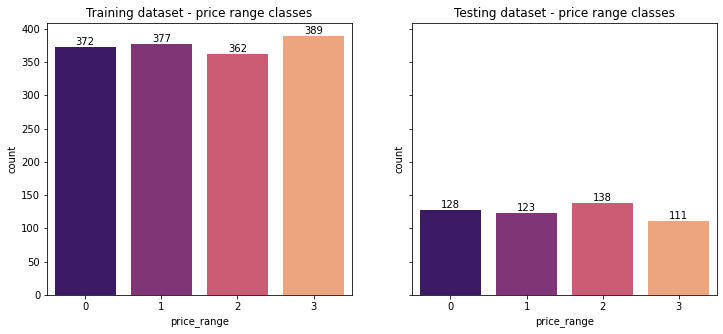

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 5), sharey=True)
haz = sns.countplot(x=yTrain, palette="magma", ax=ax1)
haz.bar_label(haz.containers[0])
plt.title("Training dataset - price range classes")
haz1 = sns.countplot(x=yTest, palette="magma", ax=ax2)
haz1.bar_label(haz1.containers[0])
ax1.title.set_text("Training dataset - price range classes")
ax2.title.set_text("Testing dataset - price range classes")
plt.show()

# ML models

Cross-validation on Training split (mean, cv=5):
ACCURACY
0.6366666666666667
ROC_AUC_OVR
0.8813491705379828


Score of the training dataset: 0.648
Score of the testing dataset: 0.628
Log-loss of the testing dataset: 0.7686626227374339
ROC-AUC score of the testing dataset: 0.878448798370097
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       128
           1       0.53      0.50      0.52       123
           2       0.54      0.47      0.50       138
           3       0.61      0.79      0.69       111

    accuracy                           0.63       500
   macro avg       0.63      0.64      0.63       500
weighted avg       0.63      0.63      0.62       500



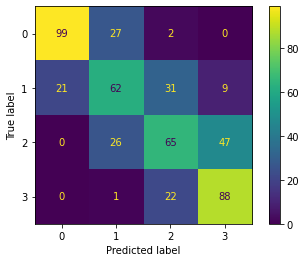

In [27]:
# Linear Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import cross_val_score
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean, cv=5):
ACCURACY
0.8119999999999999
ROC_AUC_OVR
0.9520837679283598


Score of the training dataset: 0.8266666666666667
Score of the testing dataset: 0.784
Log-loss of the testing dataset: 0.49306113510928695
ROC-AUC score of the testing dataset: 0.9449978673222301
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       128
           1       0.65      0.67      0.66       123
           2       0.71      0.71      0.71       138
           3       0.89      0.91      0.90       111

    accuracy                           0.78       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.78      0.79       500



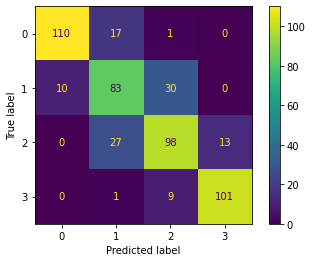

In [28]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
crossval(GSS)
classificationmodel(GNB)

Cross-validation on Training split (mean, cv=5):
ACCURACY
0.8406666666666667
ROC_AUC_OVR
0.8945804403644143


Score of the training dataset: 1.0
Score of the testing dataset: 0.8
Log-loss of the testing dataset: 6.907755278982138
ROC-AUC score of the testing dataset: 0.867700560972027
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       128
           1       0.71      0.79      0.75       123
           2       0.77      0.74      0.75       138
           3       0.85      0.84      0.84       111

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



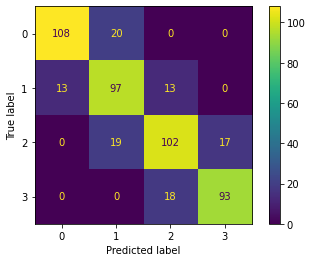

In [29]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
crossval(DTC)
classificationmodel(DTC)

Cross-validation on Training split (mean, cv=5):
ACCURACY
0.8873333333333333
ROC_AUC_OVR
0.9798849812332435


Score of the training dataset: 1.0
Score of the testing dataset: 0.856
Log-loss of the testing dataset: 0.560507436825774
ROC-AUC score of the testing dataset: 0.9698092916112379
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       128
           1       0.78      0.80      0.79       123
           2       0.83      0.79      0.81       138
           3       0.89      0.94      0.91       111

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



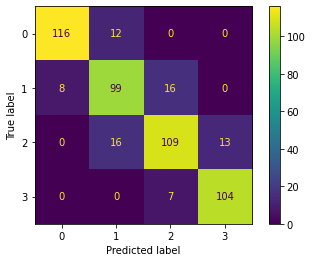

In [30]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
crossval(RFC)
classificationmodel(RFC)

Cross-validation on Training split (mean, cv=5):
ACCURACY
0.9253333333333333
ROC_AUC_OVR
0.992541032512164


Score of the training dataset: 0.958
Score of the testing dataset: 0.912
Log-loss of the testing dataset: 0.5811567446984137
ROC-AUC score of the testing dataset: 0.9840488678748803
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       128
           1       0.84      0.93      0.88       123
           2       0.91      0.86      0.88       138
           3       0.95      0.94      0.94       111

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



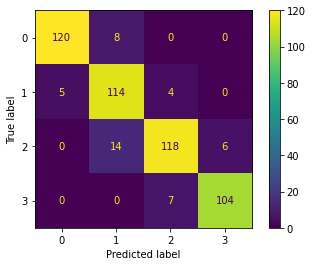

In [31]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
crossval(KNN)
classificationmodel(KNN)

Cross-validation on Training split (mean, cv=5):
ACCURACY
0.9026666666666667
ROC_AUC_OVR
0.9857217514718458


Score of the training dataset: 1.0
Score of the testing dataset: 0.884
Log-loss of the testing dataset: 0.2916125059153875
ROC-AUC score of the testing dataset: 0.9806244775065119
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       128
           1       0.83      0.86      0.84       123
           2       0.85      0.84      0.85       138
           3       0.91      0.92      0.91       111

    accuracy                           0.88       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.88      0.88      0.88       500



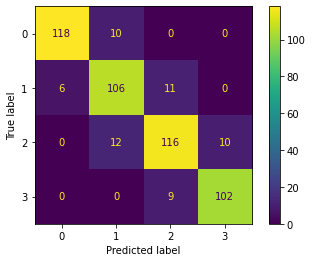

In [32]:
# Gradien Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
crossval(GBC)
classificationmodel(GBC)

Cross-validation on Training split (mean, cv=5):
ACCURACY
0.9066666666666666
ROC_AUC_OVR
0.9873843244328899


Score of the training dataset: 1.0
Score of the testing dataset: 0.904
Log-loss of the testing dataset: 0.22802399010554564
ROC-AUC score of the testing dataset: 0.9903708540150363
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       122
           1       0.89      0.88      0.89       129
           2       0.83      0.88      0.86       120
           3       0.94      0.91      0.93       129

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.91      0.90      0.90       500



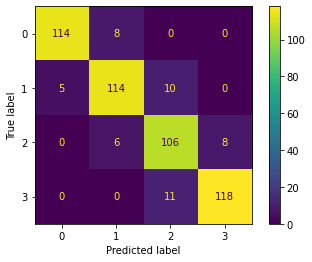

In [44]:
# XGBoost Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier()
crossval(XGB)
classificationmodel(XGB)

# RESULTS

In [34]:
results

,Model,TrainScore,TestScore,PrecisionAvg,RecallAvg,F1Avg,RocAuc
0,LR,0.648000,0.628,0.628065,0.635327,0.627822,0.878449
1,GNB,0.826667,0.784,0.790304,0.788557,0.789094,0.944998
2,DTC,1.000000,0.800,0.804542,0.802334,0.802725,0.867701
3,RFC,1.000000,0.856,0.857414,0.859480,0.858081,0.969809
4,KNN,0.958000,0.912,0.914605,0.914085,0.913499,0.984049
5,GBC,1.000000,0.884,0.885848,0.885791,0.885661,0.980624
6,XGB,1.000000,0.892,0.894093,0.893855,0.893715,0.985902


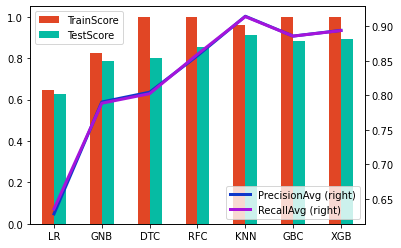

In [35]:
results[["TrainScore","TestScore"]].plot(kind="bar", color=["#E14625","#06BBA3"])
plt.xticks(range(0,len(results["Model"])), results["Model"])
results["PrecisionAvg"].plot(c="#0E38CA", linewidth=3, secondary_y=True, label="PrecisionAvg")
results["RecallAvg"].plot(c="#A514DB", linewidth=3, secondary_y=True, label="RecallAvg")
plt.legend(loc="lower right")
plt.show()

In [36]:
print("K-NearestNeighbors didn't overfit and had good results.")
results[(results["TrainScore"] > 0.9) & (results["TestScore"] > 0.9) & (results["PrecisionAvg"] > 0.9) & (results["RecallAvg"] > 0.9)]

K-NearestNeighbors didn't overfit and had good results.


,Model,TrainScore,TestScore,PrecisionAvg,RecallAvg,F1Avg,RocAuc
4,KNN,0.958,0.912,0.914605,0.914085,0.913499,0.984049


# Parameter tuning on the best performing model - K-Nearest Neighbors

In [39]:
from sklearn.model_selection import GridSearchCV
# yum = list(range(1,50))
# yup = list(range(1,50))
lup = [13,15,17,19,20,26,28]
params = { "n_neighbors":lup}
KNN = KNeighborsClassifier()
gscv = GridSearchCV(estimator=KNN, param_grid=params)
KNNGS = gscv.fit(xTrain, yTrain)
KNNGS.score(xTest, yTest)

0.916

In [40]:
KNNGSest = KNNGS.best_estimator_
KNNGSest

KNeighborsClassifier(n_neighbors=13)

Score of the training dataset: 0.9486666666666667
Score of the testing dataset: 0.916
Log-loss of the testing dataset: 0.20977167647536193
ROC-AUC score of the testing dataset: 0.9917808788863184
Classification report on Testing split:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       122
           1       0.93      0.91      0.92       129
           2       0.84      0.90      0.87       120
           3       0.93      0.89      0.91       129

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



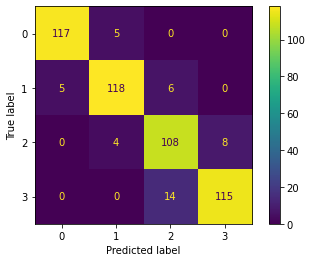

In [45]:
classificationmodel(KNNGSest)